# Step 0: Imports and Reading Data

In [3]:
# Import the usual suspects for data manipulation, statistics, and visualisations.
import pandas as pd # used to "tidy" up and manipulate our data
import numpy as np # used for matrix and numerical calculations; foundation of pandas
from scipy import stats # contains stats functions and is used to visualise probability distributions
import matplotlib.pyplot as plt # used for visualisations
import seaborn as sns # a more user-friendly library used for visualisations
plt.style.use('ggplot') #set a default style for graphs
# pd.set.option('max_columns',200) #in case columns are truncated, make them visible

# Step 1: Data Understanding

In [5]:
df = pd.read_csv('Netflix TV Shows and Movies.csv')

In [6]:
df.shape

(5283, 11)

In [7]:
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [8]:
df.columns

Index(['index', 'id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'imdb_id', 'imdb_score', 'imdb_votes'],
      dtype='object')

In [9]:
df.dtypes

index                  int64
id                    object
title                 object
type                  object
description           object
release_year           int64
age_certification     object
runtime                int64
imdb_id               object
imdb_score           float64
imdb_votes           float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [11]:
df.describe()

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.210000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


# Step 2: Data Preparation

In [13]:
#Example of dropping single column
#df.drop(['column_name'], axis=1)

In [14]:
#copy output from df.columns, paste then comment out column name we don't want to use
df.columns

Index(['index', 'id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'imdb_id', 'imdb_score', 'imdb_votes'],
      dtype='object')

In [15]:
df = df[[#'index','id', 
    'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', #'imdb_id', 
    'imdb_score', 'imdb_votes']].copy()

In [16]:
df.shape

(5283, 8)

In [17]:
#convert column to datetime format
#pd.to_datetime(df['column_name'])

In [18]:
#convert column to numberic format
#pd.to_numeric(df['column_name'])

In [19]:
#rename columns

#df.rename(columns={'old_name_1': 'new_name_1', 'old_name_2': 'new_name_2'}

In [20]:
#look for null values

df.isna().sum()

title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_score              0
imdb_votes             16
dtype: int64

In [21]:
#check for duplication

df.loc[df.duplicated()]

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes


In [22]:
df.loc[df.duplicated(subset=['title'])]

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
338,A Nightmare on Elm Street,MOVIE,The film that brings back horror icon Freddy K...,2010,R,95,5.2,99192.0
471,Dostana,MOVIE,Two straight guys who pretend to be a gay coup...,2008,PG-13,145,6.5,14944.0
1211,Christine,MOVIE,"The story of Christine Chubbuck, a 1970s TV re...",2016,R,115,6.9,14977.0
1228,Shooter,SHOW,Bob Lee Swagger is an expert marksman living i...,2016,TV-14,41,7.5,35547.0
1394,Danger Mouse,SHOW,"Danger Mouse is back saving London, saving the...",2015,NaN,12,7.2,579.0
1459,The Heirs,MOVIE,Teenagersâ€™ leisure at full swing: a group of...,2015,NaN,71,5.7,224.0
1513,Taxi Driver,MOVIE,A small-town mechanic turned chauffeur for the...,2015,NaN,100,6.0,68.0
1639,A Second Chance,MOVIE,"Popoy and Basha have had a wonderful wedding, ...",2015,NaN,130,8.6,47.0
1662,Love O2O,MOVIE,What is it that makes a man fall in love with ...,2016,NaN,105,6.4,998.0
1744,Bodyguard,SHOW,A troubled war veteran is assigned to protect ...,2018,TV-MA,60,8.1,114446.0


In [23]:
#if duplicates are shown, use a query to investigate the duplicated
df.query("title == 'A Nightmare on Elm Street'")

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
50,A Nightmare on Elm Street,MOVIE,Teenagers in a small town are dropping like fl...,1984,R,91,7.4,230543.0
338,A Nightmare on Elm Street,MOVIE,The film that brings back horror icon Freddy K...,2010,R,95,5.2,99192.0


In [24]:
# #to remove duplicate rows, this will show how many are copies, based on further criteria
# df.duplicated(subset=['col1', 'col2', 'col3']).sum()
# #the following will create a df without these copies, using ~ to select the inversion of the duplicate selection made, also maintaining indexing
# df = df.loc[~df.duplicated(subset=['col1', 'col2', 'col3'])].reset_index(drop=True).copy()

In [25]:
#old code to consider discarding
# df_stats = df.copy()
# cols_to_drop = ['index','id','description','imdb_id']
# df_stats = df_stats.drop(cols_to_drop, axis=1)
# df_no_year = df_stats[df_stats['release_year'].isna()]
# df_no_age = df_stats[df_stats['age_certification'].isna()]
# df_no_runtime = df_stats[df_stats['runtime'] == 0]
# print(f"There are {df_no_year.shape[0]} entries with no year.")
# print(f"There are {df_no_age.shape[0]} entries with no age certification.")
# print(f"There are {df_no_runtime.shape[0]} entries with no runtime.")
# print(f"There are {df_stats['type'].unique().shape[0]} types: {df_stats['type'].unique()}")
# df_stats

# Step 3: Feature Understanding

In [27]:
#value counting to get started
df['release_year'].value_counts()

2019    749
2018    733
2021    687
2020    657
2017    555
       ... 
1974      1
1959      1
1962      1
1978      1
1985      1
Name: release_year, Length: 66, dtype: int64

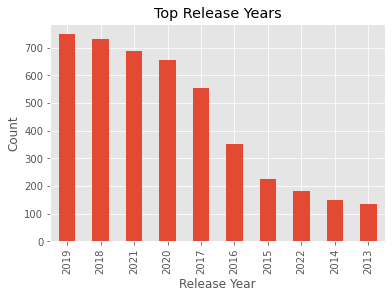

In [28]:
ax = df['release_year'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top Release Years')
ax.set_xlabel('Release Year')
ax.set_ylabel('Count');

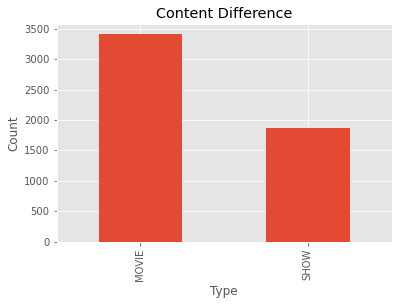

In [133]:
ax = df['type'].value_counts() \
    .plot(kind='bar', title='Content Difference')
ax.set_xlabel('Type')
ax.set_ylabel('Count');

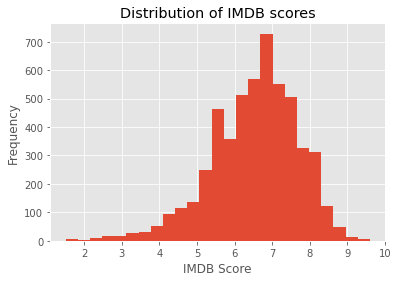

In [29]:
ax = df['imdb_score'].plot(kind='hist', \
                           bins=25,\
                           title='Distribution of IMDB scores')
ax.set_xlabel('IMDB Score');

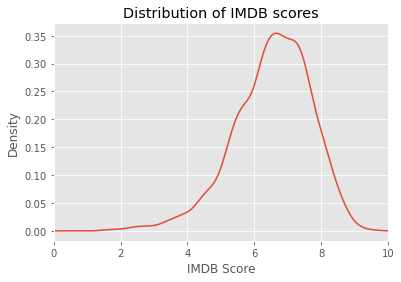

In [111]:
ax = df['imdb_score'].plot(kind='kde', \
                           title='Distribution of IMDB scores')
ax.set_xlabel('IMDB Score')
plt.xlim(left=0, right=10);

# Step 4: Feature Relationships

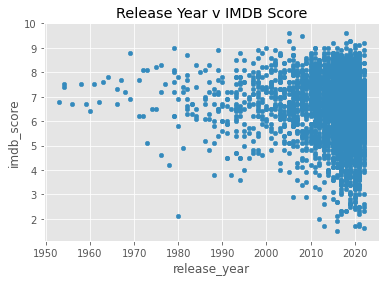

In [32]:
df.plot(kind='scatter', x='release_year', y='imdb_score', title='Release Year v IMDB Score');

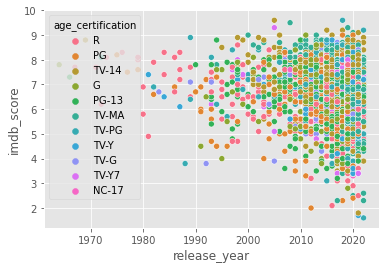

In [33]:
sns.scatterplot(x='release_year', y='imdb_score', data=df, hue='age_certification');

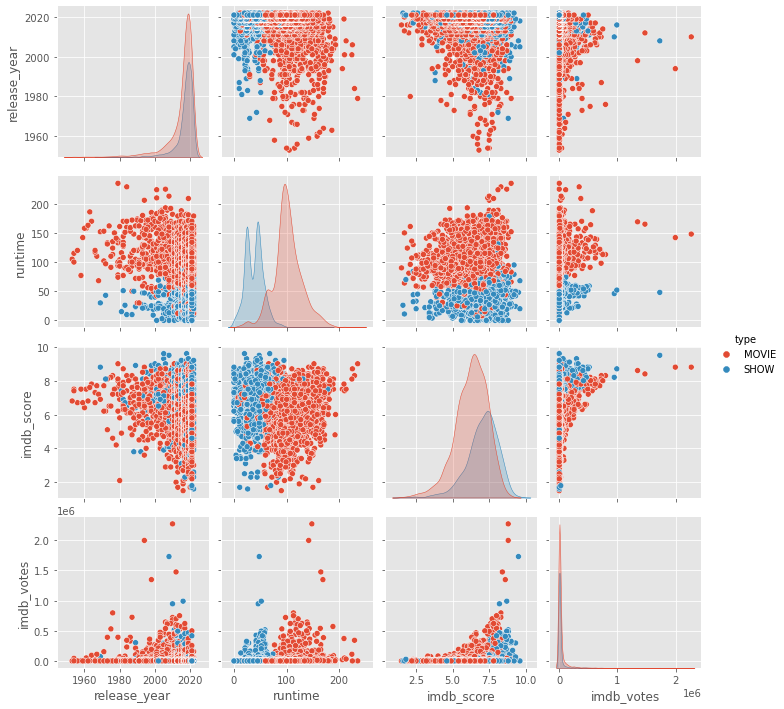

In [34]:
sns.pairplot(df, vars=['release_year', 'runtime', 'imdb_score', 'imdb_votes'],hue='type');

In [35]:
df_corr = df[['release_year', 'runtime', 'imdb_score', 'imdb_votes']].dropna().corr()
df_corr

,release_year,runtime,imdb_score,imdb_votes
release_year,1.000000,-0.200618,-0.102952,-0.196988
runtime,-0.200618,1.000000,-0.158390,0.138610
imdb_score,-0.102952,-0.158390,1.000000,0.189954
imdb_votes,-0.196988,0.138610,0.189954,1.000000


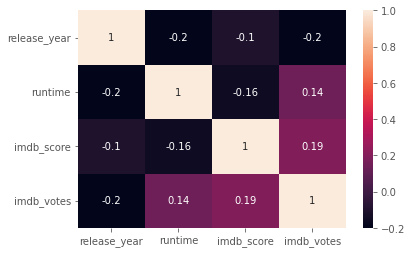

In [79]:
sns.heatmap(df_corr, annot=True);

# Step 5: Ask Questions
- What years did the the most content come out?
- How has audience rating changed over time as quantity of content changes?
- Which type of content has the best ratings?
- Are movies rating differently based on the age certification?

In [38]:
df.head()

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0


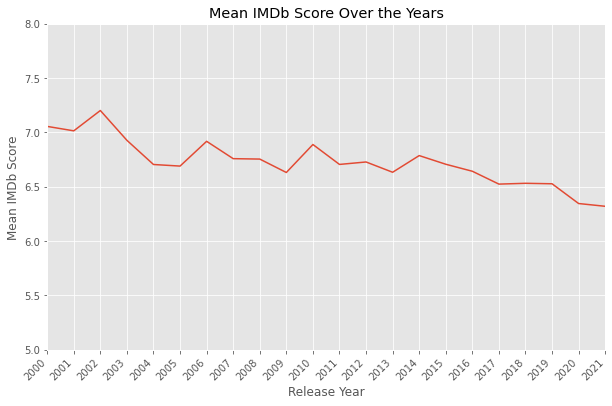

In [125]:
# Group by 'release_year' and calculate the mean IMDb score for each year
mean_scores_by_year = df.groupby('release_year')['imdb_score'].mean().reset_index()

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(mean_scores_by_year['release_year'], mean_scores_by_year['imdb_score'], linestyle='-')
plt.xticks(mean_scores_by_year['release_year'].astype(int), rotation=45, ha='right')
plt.title('Mean IMDb Score Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Mean IMDb Score')
plt.xlim(left=2000, right=2021)
plt.ylim(top=8, bottom=5)
plt.grid(True);

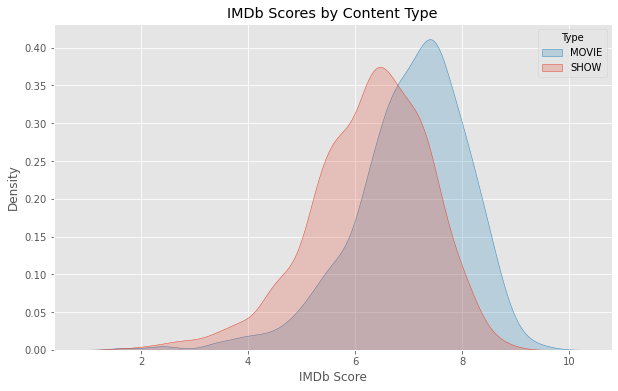

In [123]:
plt.figure(figsize=(10, 6))

# Specify the order of the 'type' categories for the legend
hue_order = df['type'].unique()

sns.kdeplot(data=df, x='imdb_score', hue='type', fill=True, common_norm=False, hue_order=hue_order)

plt.title('IMDb Scores by Content Type')
plt.xlabel('IMDb Score')
plt.ylabel('Density')

# Provide unique labels for the legend
plt.legend(title='Type', labels=hue_order);

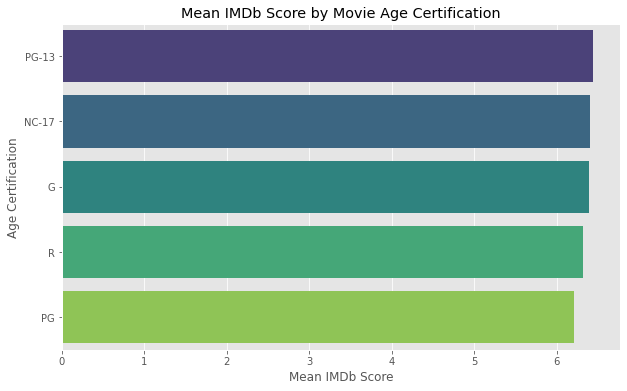

In [155]:
# Calculate the mean IMDb score for each age certification
df_movie_mask = df[df['type']=='MOVIE']
mean_scores_by_age_cert = df_movie_mask.groupby('age_certification')['imdb_score'].mean().reset_index()

# Order age certifications based on mean IMDb ratings
ordered_age_certifications = mean_scores_by_age_cert.sort_values(by='imdb_score', ascending=False)['age_certification']

# Plotting the horizontal bar graph using Seaborn with ordered age certifications
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_scores_by_age_cert, x='imdb_score', y='age_certification', order=ordered_age_certifications, palette='viridis')

plt.title('Mean IMDb Score by Movie Age Certification')
plt.xlabel('Mean IMDb Score')
plt.ylabel('Age Certification')

plt.show()

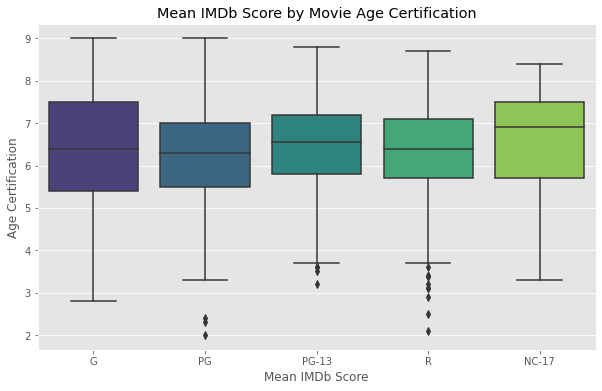

In [166]:
# Manually set the order of age certifications
custom_order = ['G', 'PG', 'PG-13', 'R', 'NC-17']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_movie_mask, x="age_certification", y='imdb_score', order=custom_order, palette='viridis')
plt.title('Mean IMDb Score by Movie Age Certification')
plt.xlabel('Mean IMDb Score')
plt.ylabel('Age Certification')
plt.show()